#Download Dataset

In [ ]:
!pip install -q kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tommygu17","key":"d921bac8331dec2cdcad468f02a407c8"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!mv kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vechoo/diet-plan-recommendation

Dataset URL: https://www.kaggle.com/datasets/vechoo/diet-plan-recommendation
License(s): unknown
diet-plan-recommendation.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/diet-plan-recommendation.zip

Archive:  /content/diet-plan-recommendation.zip
  inflating: Dataset.csv             


#Import Library

In [ ]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight,BMI_tags,Label
0,1,2,16.097862,0.932025,F,18.531612,958.584,1.2,1150.3008,8,13
1,2,4,14.619374,0.916687,F,17.397496,932.383,1.7,1585.0511,7,1
2,4,4,17.899918,0.997288,F,17.997414,977.578,1.9,1857.3982,7,4
3,6,3,13.532880,1.022786,F,12.936609,944.689,1.9,1794.9091,7,3
4,8,4,17.039484,1.053977,M,15.338909,799.229,1.9,1518.5351,7,0


In [ ]:
df.shape

(10726, 11)

In [ ]:
df.describe()

,Unnamed: 0,age,weight(kg),height(m),BMI,BMR,activity_level,calories_to_maintain_weight,BMI_tags,Label
count,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000
mean,11664.753123,26.778575,61.647728,1.540276,24.788317,1442.049923,1.487451,2118.574075,8.253496,19.332650
std,6814.683196,18.201675,24.254566,0.186042,6.954637,250.686166,0.239625,388.425427,0.754767,9.746498
min,1.000000,2.000000,12.005536,0.856328,10.342285,667.941000,1.200000,953.540900,7.000000,0.000000
25%,5959.750000,13.000000,45.538375,1.564845,19.557137,1320.322500,1.300000,1815.879700,8.000000,16.000000
50%,10695.500000,23.000000,61.323460,1.631282,23.056039,1493.165000,1.500000,2104.599800,8.000000,20.000000
75%,17455.250000,36.000000,83.484585,1.632234,31.334294,1602.488000,1.700000,2405.301750,9.000000,28.000000
max,23998.000000,90.000000,98.799820,1.633223,37.142927,1914.374000,1.900000,2949.075500,9.000000,31.000000


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
age,0
weight(kg),0
height(m),0
gender,0
BMI,0
BMR,0
activity_level,0
calories_to_maintain_weight,0
BMI_tags,0


**No Data Null**

In [ ]:
#drop irrelevant column

df = df.drop(columns=['Unnamed: 0', 'BMI_tags', 'Label'])

In [ ]:
# Convert gender to numerical values and height in cm

#Female is 1 and Male is 0

df['gender'] = df['gender'].apply(lambda x: 1 if x == 'F' else 0)

#height in cm
df['height(m)'] *= 100
df.rename(columns={'height(m)': 'height(cm)'}, inplace=True)

In [ ]:
df.head()

,age,weight(kg),height(cm),gender,BMI,BMR,activity_level,calories_to_maintain_weight
0,2,16.097862,93.202488,1,18.531612,958.584,1.2,1150.3008
1,4,14.619374,91.668688,1,17.397496,932.383,1.7,1585.0511
2,4,17.899918,99.728772,1,17.997414,977.578,1.9,1857.3982
3,3,13.532880,102.278630,1,12.936609,944.689,1.9,1794.9091
4,4,17.039484,105.397666,0,15.338909,799.229,1.9,1518.5351


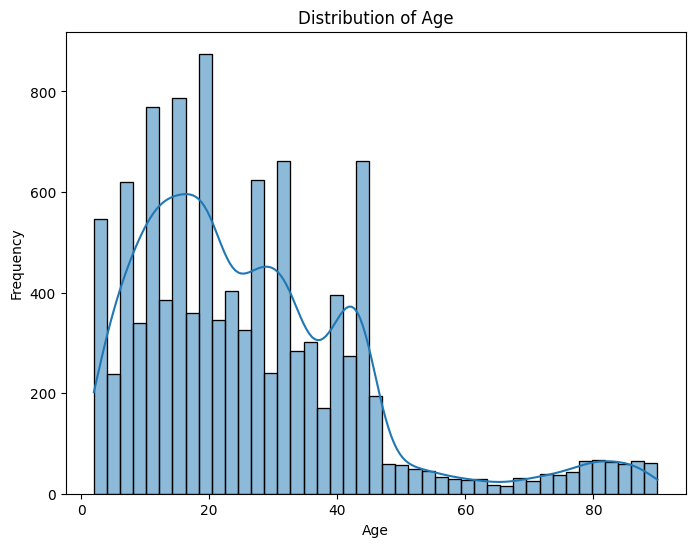

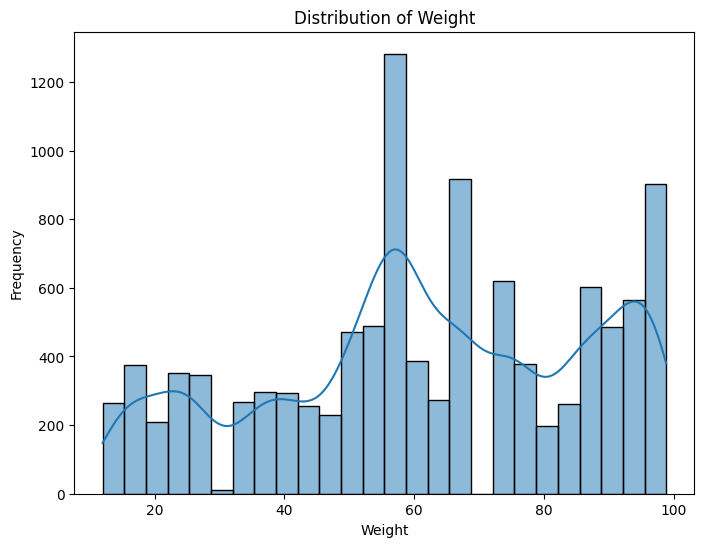

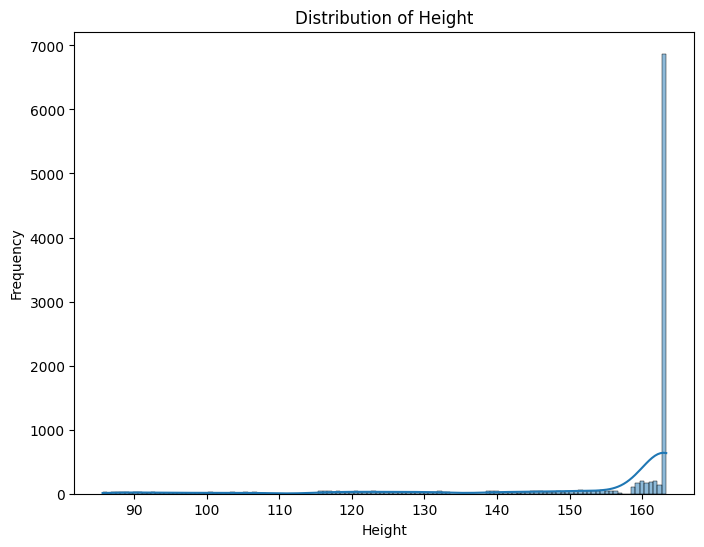

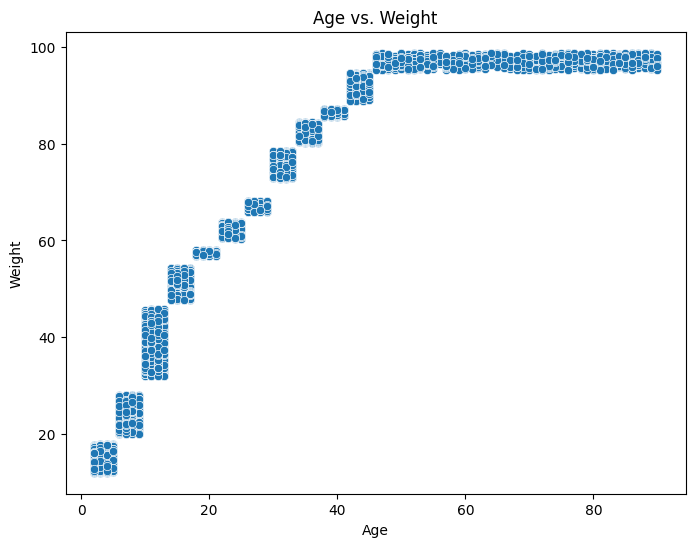

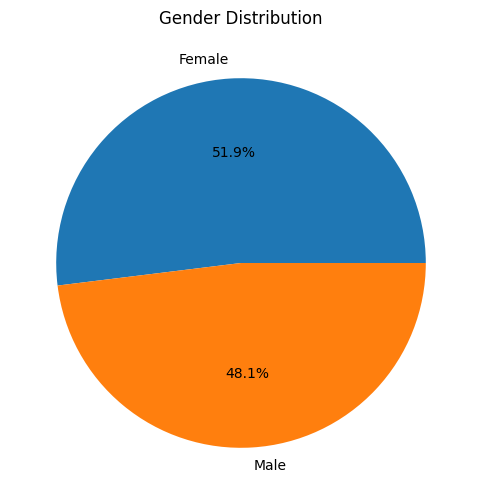

In [ ]:
# Visualize the distribution of age
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of weight
plt.figure(figsize=(8, 6))
sns.histplot(df['weight(kg)'], kde=True)
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of height
plt.figure(figsize=(8, 6))
sns.histplot(df['height(cm)'], kde=True)
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationship between age and weight
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='weight(kg)', data=df)
plt.title('Age vs. Weight')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()

# Visualize the gender distribution
plt.figure(figsize=(6, 6))
# Replace 'gender' with a temporary Series for the visualization
gender_labels = df['gender'].map({0: 'Male', 1: 'Female'})
gender_labels.value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

In [ ]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv('../data/Diet Plan Recommendation/cleaned_dataset.csv', index=False)